 # Guided exercice
 This exercice comes from « Practical Data Mining with Python » , Giuseppe Vettigli 
   
 ## Data imports 
The file describes 50 specimen of iris, belonging to 3 different species (Iris setosa, Iris virginica and Iris versicolor). Each specimen is described with 4 caracteristics: 
    - length of Sepal,
    - width of Sepal,
    - length of Petals,
    - width of Petal.
 
 The specie is the 5th data.

 Data is presented in a csv file. To facilitate the use, it will be store in a panda dataFrame

In [1]:
# Import of the needed libraires
#graphical librairies
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import figure, subplot, hist, xlim, show, plot
%matplotlib inline

#data librairies 

import pandas as pd
import pylab as pl
import numpy as np

from pandas.plotting import scatter_matrix
from pandas.plotting import boxplot
from pandas.plotting import parallel_coordinates

In [2]:
#data importand creation of panda object
data_panda = pd.read_csv('iris_english.csv')

Check that import went well. 
Display the columns names

In [3]:
print(data_panda.keys())

Index(['Sepal_lenght', 'Sepal_width', 'Petal_lenght', 'Petal_width',
       'Species'],
      dtype='object')


In [4]:
data_panda.dtypes

Sepal_lenght    float64
Sepal_width     float64
Petal_lenght    float64
Petal_width     float64
Species          object
dtype: object

We can also display the names of species and their repartition.

In [5]:
data_panda['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
data_panda.groupby('Species').describe()

Sepal_lenght                                              \
                  count   mean       std  min    25%  50%  75%  max   
Species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           Sepal_width         ... Petal_lenght      Petal_width         \
                 count   mean  ...          75%  max       count   mean   
Species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
Species                                        
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [7]:
#definition of the colors used for visualization 
colors = np.where(data_panda['Species']=='setosa','r','-')
colors[data_panda['Species']=='versicolor'] = 'g'
colors[data_panda['Species']=='virginica']= 'b'
#print(colors)
color_dict={'setosa':'r','versicolor':'g' ,'virginica':'b'}

## Visualization
Visualization enables to better understand the input data  and to verify the need of pre-treatments.



In [8]:
# to facilitate futur use, we can create a set with the input columns
Input_cols = ['Sepal_lenght', 'Sepal_width', 'Petal_lenght', 'Petal_width']

The choice of input data is very important. 2 things should be considered :
the target value should be excluded from this set.
random data or data unrelated to the target should not be included.



In [9]:
data_panda.corr(numeric_only=True)

,Sepal_lenght,Sepal_width,Petal_lenght,Petal_width
Sepal_lenght,1.000000,-0.109369,0.871754,0.817954
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_lenght,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


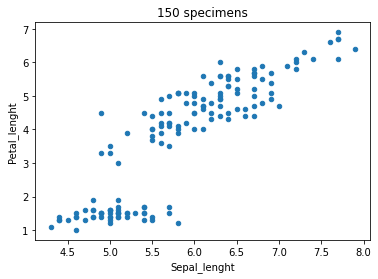

In [10]:
# on représente ainsi la longeur des pétales  en fonction de la longueur des sépales 

data_panda.plot(kind="scatter", x='Sepal_lenght', y='Petal_lenght')

plt.title('150 specimens') 
plt.show()


We can use the defined colors to stress out the species.

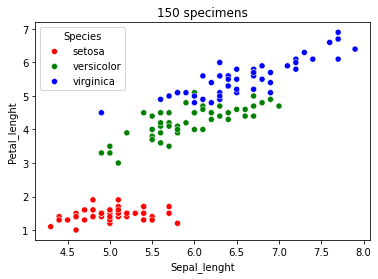

In [11]:
sns.scatterplot(x='Sepal_lenght', y='Petal_lenght', hue='Species', palette=color_dict, data=data_panda) 

plt.title('150 specimens') 
plt.show()

We can also use histograms and compare the distribution .


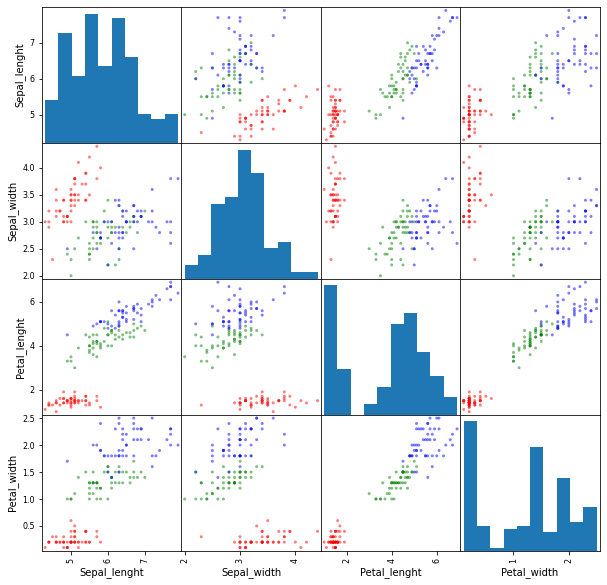

In [12]:
scatter_matrix(data_panda, figsize=(10, 10), diagonal='hist', c=colors);

We can also use boxplots.

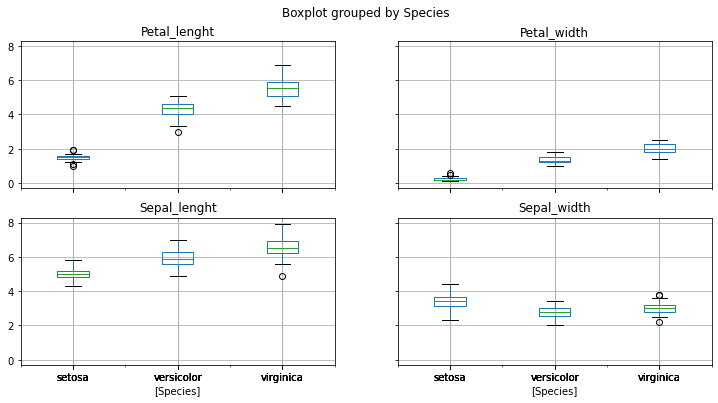

In [13]:
data_panda.boxplot(by='Species', figsize=(12, 6));

These graphics can give us ideas to ease the classification. for instance we can see that  Iris Setosa have smaller Sepal than Iris Virginica.

# Pre treatment
## Normalization

To garanty that the use of Euclidan distances will not favor one characteristics, we need to work on normalized data.

In [14]:
#normalisation
import copy
Norm=copy.deepcopy(data_panda)
Norm[Input_cols]=(data_panda[Input_cols]-data_panda[Input_cols].min())/(data_panda[Input_cols].max()-data_panda[Input_cols].min())
print(Norm.keys())

Index(['Sepal_lenght', 'Sepal_width', 'Petal_lenght', 'Petal_width',
       'Species'],
      dtype='object')


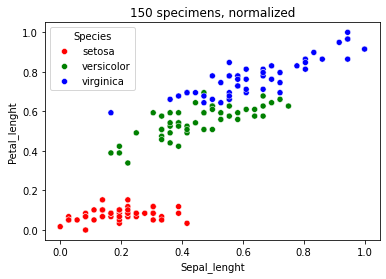

In [15]:
sns.scatterplot(x='Sepal_lenght', y='Petal_lenght', hue='Species', palette=color_dict, data=Norm) 
plt.title('150 specimens, normalized') 
plt.show()

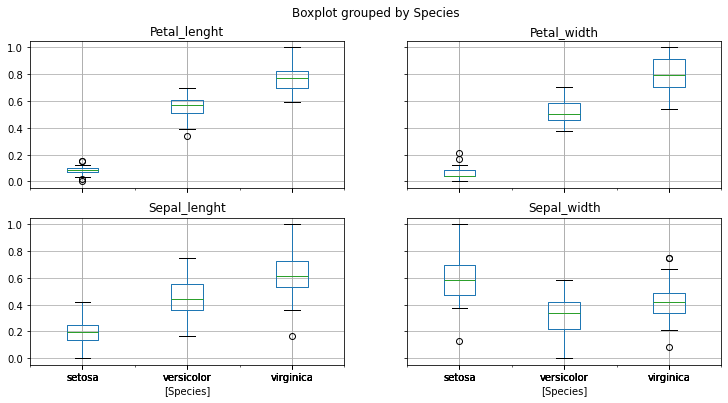

In [16]:
Norm.boxplot(by='Species', figsize=(12, 6));

## Encoding
Some methods can only use numerical data. In order to use them we need to transform the target values into integers.

In [17]:
    #transformation des espèces en numéro de classe
Norm.Species=Norm.Species.astype('category')
Norm['Species_encoded'],dict_cat=Norm.Species.factorize()
  # le dictionnaire d encodage est stocké dans le vecteur dict_cat
print(dict_cat)


CategoricalIndex(['setosa', 'versicolor', 'virginica'], categories=['setosa', 'versicolor', 'virginica'], ordered=False, dtype='category')


In [18]:
  #créons le dictionnaire des couleurs associé
color_dict_encoded={}
for i in range (0, 3):
      color_dict_encoded[i]=color_dict[dict_cat[i]]
print(color_dict_encoded)

{0: 'r', 1: 'g', 2: 'b'}


## Principal component analysis


Principal component analysis project data in a space where variance is maximized. 
This means that if 2 points are different in a n-dimension space they should not overlap in the 2-dimension PCA space.

Lets determine the lost information.

In [19]:
from sklearn.decomposition import PCA
for i in range(1,5):

    pca = PCA(n_components=i)

    pca.fit(Norm[Input_cols])

    print (i, 'components representa data loss of' ,(1-sum(pca.explained_variance_ratio_)) * 100,'%')


1 components representa data loss of 15.85809886540358 %
2 components representa data loss of 4.125625123551746 %
3 components representa data loss of 0.6350607719880497 %
4 components representa data loss of 1.1102230246251565e-14 %


We will use the 2-D representation for visualization.
If the algortihmes take too long we should decide which PCA recduction is an acceptable loss.

In [20]:
n_components=2
pca = PCA(n_components)
pca.fit(Norm[Input_cols])
pca_apply = pca.transform(Norm[Input_cols])

We can identify the composition of those 2 components from the 4 initial dimensions.

In [21]:
base=pd.DataFrame(pca.components_,columns=Norm[Input_cols].columns,index = ['PCA0','PCA1'])            
print(base)

      Sepal_lenght  Sepal_width  Petal_lenght  Petal_width
PCA0      0.425289    -0.146122      0.616105     0.646678
PCA1      0.421006     0.904705     -0.064326    -0.011165


In [22]:
pcad_panda=pd.DataFrame(pca_apply, columns=['PCA%i' % i for i in range(n_components)]) #save in a panda object
Norm=pd.concat([Norm, pcad_panda], axis=1)#concatenate in norm_pd
print(Norm.keys())

Index(['Sepal_lenght', 'Sepal_width', 'Petal_lenght', 'Petal_width', 'Species',
       'Species_encoded', 'PCA0', 'PCA1'],
      dtype='object')


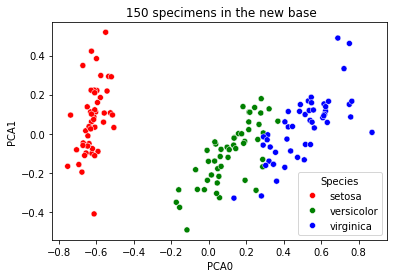

In [23]:
#visualization
sns.scatterplot(x='PCA0',y='PCA1', hue='Species',palette=color_dict, data=Norm)
pl.xlabel('PCA0')
pl.ylabel('PCA1')
pl.title(' 150 specimens in the new base')    
plt.show()



## Classification

Classification enables to assoign a category to a specimen. 2 steps are required:
- Learning
- Prediction.

Python librairy "sklearn" has numerous classification models. Here we will use Gaussian Naive Bayes to determine the species of the iris.


# Gaussian Naive Bayes 



The data should then be split in 2 groups:
- learning set
- test set

This split can be done manually by an expert (which will be the case for the car example) or can be done randomly wiht the "train_test_split" function.

In this case, the expert should only choose the  % of each group. Here we choose  40% of the specimens for the training set.

In [24]:
from sklearn.model_selection import train_test_split

#Learning population is called train,
#the target value (species) t_train
#test population is called test
#the predicted value t_test

train, test, t_train, t_test = train_test_split(Norm, Norm['Species_encoded'], test_size=0.4, random_state=0)
#print(train)
#print(test)

Lest visualize the repartition between the 2 sets

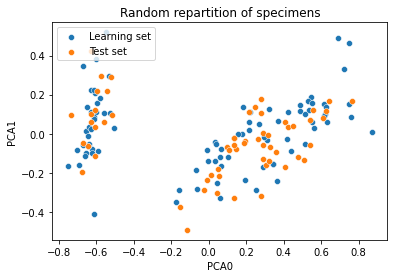

In [25]:
sns.scatterplot(x='PCA0',y='PCA1', data=train)
sns.scatterplot(x='PCA0',y='PCA1', data=test)

pl.xlabel('PCA0')
pl.ylabel('PCA1')
plt.legend( loc='upper left', labels=['Learning set', 'Test set'])
pl.title('Random repartition of specimens') 

plt.show()
    
    

1st step - learning.

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier_GNB=GaussianNB()
#Learning
classifier_GNB.fit(train[Input_cols],train['Species_encoded']) # train
#Prediction
prediction_train =classifier_GNB.predict(train[Input_cols]) #prediction


In [27]:
#here we can compare the preduction and real specy for the first specimen
print('The first flower is a '+train['Species'][0]+' (encoded as '+ str(train['Species_encoded'][0])+')')
print('The Naive Bayes method predicts it as '+ dict_cat[prediction_train [0]])


The first flower is a setosa (encoded as 0)
The Naive Bayes method predicts it as versicolor


We can measure the performance  on all the train set.

In [28]:
print (classifier_GNB.score(train[Input_cols],t_train)) # test


0.9777777777777777


This performance is the number of correct preductions divied by the number of specimens in the test set.
This is the proportion of accurate prediction.
If we are happy with the result we can apply it on the test set to ensure that there are no aver-fitting

In [29]:
prediction_test =classifier_GNB.predict(test[Input_cols]) #prediction
print (classifier_GNB.score(test[Input_cols],t_test)) # test

0.9333333333333333


In [30]:
prediction =classifier_GNB.predict(Norm[Input_cols]) #prediction

An evaluation tool is the confusion matrix. In this matrix columns are predicted classes and rows the real classes.


In [31]:
from sklearn.metrics import confusion_matrix
M_GNB=confusion_matrix(prediction_test,t_test)
print (M_GNB)


[[16  0  0]
 [ 0 23  4]
 [ 0  0 17]]


We can also represent this info in a graph.

/tmp/ipykernel_8864/479012404.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conf_GNB=pd.concat([conf_GNB,new_row], ignore_index=True)


<function matplotlib.pyplot.show(close=None, block=None)>

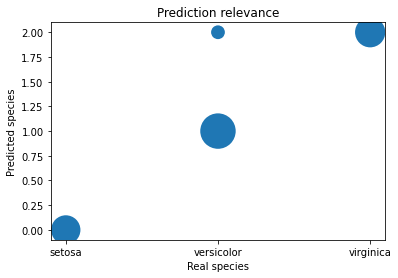

In [32]:
conf_GNB = pd.DataFrame(columns=['real','real_name','predicted','density'])
for i in range (0, 3):
    for j in range (0,3) :
        if M_GNB[i][j]>0 :
            new_row =pd.DataFrame({'real':i, 'real_name':dict_cat[i],'predicted':j, 'density':float(M_GNB[i][j])}, index=[0])
            conf_GNB=pd.concat([conf_GNB,new_row], ignore_index=True)
sns.scatterplot(x='real_name', y='predicted', s=(conf_GNB.density)*60, data=conf_GNB) 
pl.xlabel('Real species')
pl.ylabel('Predicted species')
pl.title('Prediction relevance')
show

In this representation, the errors are the non diagonal elements. Here iris versicolor were labbeled as virginica. 

Other metrics can be used.

In [33]:
from sklearn.metrics import classification_report

print (classification_report(prediction_test,t_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.85      0.92        27
           2       0.81      1.00      0.89        17

    accuracy                           0.93        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.95      0.93      0.93        60



- Precision : proportion of the class attributed rightfully
- Recall : proportion of elements of this class wrongfully  attributed
- F1-Score: Harmonic mean of the 2 other indicators
- support : numbre of element of this class used in the test.

To be relevant the evaluation should be done in multiple pairs (learning set/test set). 
We can then use "Cross Validation". It split the initial population several times. The performance of the classfication is the mean of the several evaluations.

In [34]:
from sklearn.model_selection import cross_val_score

# cross validation with 6 iterations 
scores = cross_val_score(classifier_GNB,Norm[Input_cols], Norm['Species_encoded'], cv=6)

print (scores)

[0.92 1.   0.92 0.96 0.92 1.  ]


The result is a vector with the perf for each iteration.


In [35]:
from numpy import mean

print (mean(scores))


0.9533333333333333


## Use
If we are happy with the classification we can use it to classify the whole set 

In [36]:
prediction_test_GNB =classifier_GNB.predict(Norm[Input_cols]) #prediction
pred_GNB = pd.DataFrame(prediction_test_GNB )
pred_GNB.columns = ['Prediction_GNB']

#we merge this dataframe with df
Norm= pd.concat([Norm,pred_GNB], axis = 1)

We can also use it for new specimen. For instance, what is the species of a flower with  Petal and Sepal normalized lenght  and width of 0.5.?

In [37]:
New_specimen = {'Sepal_lenght': [0.5],
        'Sepal_width': [0.5],
        'Petal_lenght': [0.5],
        'Petal_width': [0.5],
        }
panda_New_specimen = pd.DataFrame(New_specimen)  
D=classifier_GNB.predict(panda_New_specimen)
print('Using Gaussian Naive Bayes, the predicted species of such a flower is '+ dict_cat[D[0]])

Using Gaussian Naive Bayes, the predicted species of such a flower is versicolor


# Neuron network
For Neuron network we follow the same method: learn on a train set, apply on a test set and if we are happy with the performance use it for prediction

In [38]:
from sklearn.neural_network import MLPClassifier
classifier_NN = MLPClassifier()
#learn
classifier_NN.fit(train[Input_cols],train['Species_encoded']) # learning classifier.fit(input_dat, target_data)
#use on test
prediction =classifier_NN.predict(test[Input_cols]) #prediction
#evaluate on test
print (classifier_NN.score(test[Input_cols],t_test)) # test

0.8666666666666667


/home/mathijs/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
#application on the whole set
prediction_NN =classifier_NN.predict(Norm[Input_cols]) #prediction
pred_NN = pd.DataFrame(prediction_NN )
pred_NN.columns = ['Prediction_NN']

#we merge this dataframe with df
Norm= pd.concat([Norm,pred_NN], axis = 1)

In [40]:
M_NN=confusion_matrix(Norm['Species_encoded'],Norm['Prediction_NN'])
print (M_NN)

[[50  0  0]
 [ 0 40 10]
 [ 0  2 48]]


/tmp/ipykernel_8864/2093308479.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  confNN=pd.concat([confNN,new_row], ignore_index = True)


<function matplotlib.pyplot.show(close=None, block=None)>

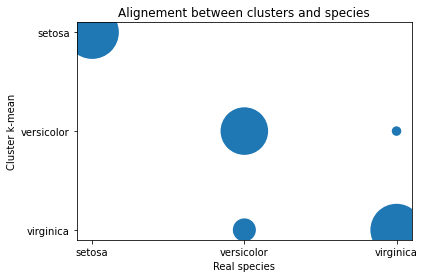

In [41]:
confNN = pd.DataFrame(columns=['real','real_species','predicted','predictionNN','density'])
for i in range (0, 3):
    for j in range (0,3) :
        if M_NN[i][j]>0 :
            new_row = pd.DataFrame({'real':i, 'real_species':dict_cat[i],'predicted':j,'predicted_cluster':dict_cat[j], 'density':float(M_NN[i][j])}, index=[0])
            confNN=pd.concat([confNN,new_row], ignore_index = True)             
sns.scatterplot(x='real_species', y='predicted_cluster', s=(confNN.density)*60, data=confNN) 
pl.xlabel('Real species')
pl.ylabel('Cluster k-mean')
pl.title('Alignement between clusters and species')
show

## Clustering

When initial data are not labelled, groups need to be created base on similarity.
This is unsupervised learning.
Here we will use a classical clustering analysis method: k-mean.

In [42]:
print(Norm[Input_cols])

     Sepal_lenght  Sepal_width  Petal_lenght  Petal_width
0        0.222222     0.625000      0.067797     0.041667
1        0.166667     0.416667      0.067797     0.041667
2        0.111111     0.500000      0.050847     0.041667
3        0.083333     0.458333      0.084746     0.041667
4        0.194444     0.666667      0.067797     0.041667
..            ...          ...           ...          ...
145      0.666667     0.416667      0.711864     0.916667
146      0.555556     0.208333      0.677966     0.750000
147      0.611111     0.416667      0.711864     0.791667
148      0.527778     0.583333      0.745763     0.916667
149      0.444444     0.416667      0.694915     0.708333

[150 rows x 4 columns]


In [43]:
Norm.dtypes

Sepal_lenght        float64
Sepal_width         float64
Petal_lenght        float64
Petal_width         float64
Species            category
Species_encoded       int64
PCA0                float64
PCA1                float64
Prediction_GNB        int64
Prediction_NN         int64
dtype: object

In [44]:
from sklearn import cluster
from sklearn.cluster import KMeans 
from sklearn.metrics import completeness_score, homogeneity_score

In [45]:
Nombre_clusters=3#cluster nombers matching rhe numbers of species
kmeans = KMeans(n_clusters=Nombre_clusters, init='random',n_init='auto') # initialization 
kmeans.fit(Norm[Input_cols]) #K-means training
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
    
    
print('Coordinates of the  3 centroids')
print(centroids)


Coordinates of the  3 centroids
[[0.70726496 0.4508547  0.79704476 0.82478632]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.44125683 0.30737705 0.57571548 0.54918033]]


In [46]:
#actual prediction
y_pred = kmeans.predict(Norm[Input_cols])
#We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Prediction_kmean']
 

#we merge this dataframe with df
Norm = pd.concat([Norm,pred], axis = 1)


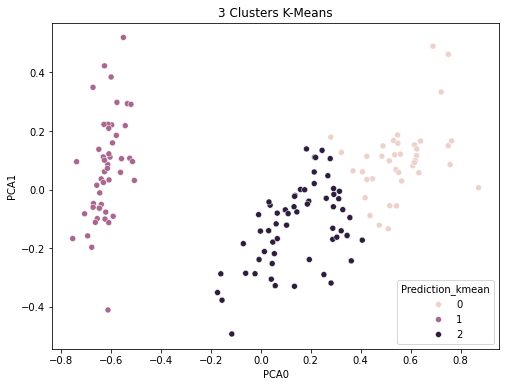

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='PCA0', y='PCA1', hue='Prediction_kmean', data=Norm) 
pl.title('3 Clusters K-Means')
pl.show()

We can compare these clusterswith the reality to obtain the performance.



In [48]:
print (completeness_score(Norm['Species_encoded'],Norm['Prediction_kmean']))

0.7474865805095324


Completeness is near to 1 when all elements of a class belong to the same cluster.

In [49]:
print (homogeneity_score(Norm['Species_encoded'],Norm['Prediction_kmean']))

0.7364192881252849


Homogeneity is near to 1 when all elements of a cluster belong to the same class.

Visualization also enables to confront clustering to reality.

Text(0.5, 1.0, '3 Clusters K-Means')

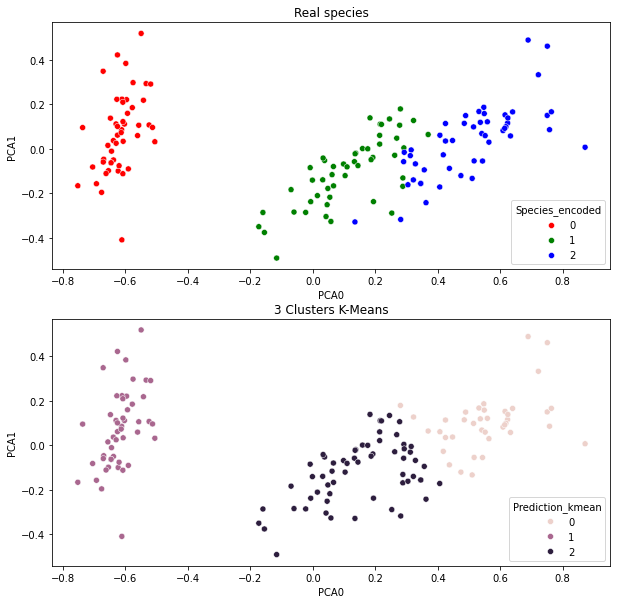

In [50]:
figure = plt.figure(figsize = (10, 10))
plt.tight_layout()

plt.figure(1)
plt.subplot(211)
sns.scatterplot(x='PCA0', y='PCA1', hue='Species_encoded', palette=color_dict_encoded, data=Norm) 
plt.title('Real species')


plt.subplot(212)
sns.scatterplot(x='PCA0', y='PCA1', hue='Prediction_kmean', data=Norm) 
plt.title('3 Clusters K-Means')

In [51]:
M2=confusion_matrix(Norm['Species_encoded'],Norm['Prediction_kmean'])
print (M2)

[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


!!!BEWARE!!!!
Here perfect identification does not mean diagonal matrix. It does not matter if setosa are clustern°1, n° 2 or n°3. 

Let's represent it graphicaly.

/tmp/ipykernel_8864/2387276474.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conf1=pd.concat([conf1,new_row], ignore_index = True)


<function matplotlib.pyplot.show(close=None, block=None)>

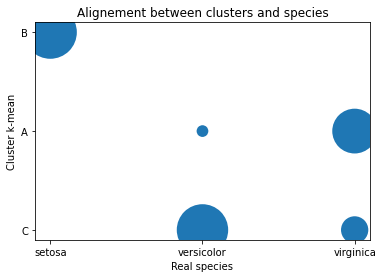

In [52]:
dict_cluster={0: 'A', 1: 'B', 2: 'C'}
conf1 = pd.DataFrame(columns=['real','real_species','predicted','predicted_cluster','density'])
for i in range (0, 3):
    for j in range (0,3) :
        if M2[i][j]>0 :
            new_row = pd.DataFrame({'real':i, 'real_species':dict_cat[i],'predicted':j,'predicted_cluster':dict_cluster[j], 'density':float(M2[i][j])}, index=[0])
            conf1=pd.concat([conf1,new_row], ignore_index = True)             
sns.scatterplot(x='real_species', y='predicted_cluster', s=(conf1.density)*60, data=conf1) 
pl.xlabel('Real species')
pl.ylabel('Cluster k-mean')
pl.title('Alignement between clusters and species')
show

In [53]:
print (classification_report(Norm['Species_encoded'],Norm['Prediction_kmean']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150



To "match" the clusters to the real labels (here species) we can use the following function 

In [54]:
#This function find the best fit between clusters and labels
from itertools import permutations # import this into script.
#tested with python 3.6
def remap_labels(pred_labels, true_labels):
    """Rename prediction labels (clustered output) to best match true labels."""
   
    pred_labels, true_labels = np.array(pred_labels), np.array(true_labels)
    assert pred_labels.ndim == 1 == true_labels.ndim
    assert len(pred_labels) == len(true_labels)
    cluster_names = np.unique(pred_labels)
    accuracy = 0

    perms = np.array(list(permutations(np.unique(true_labels))))

    remapped_labels = true_labels
    for perm in perms:
        flipped_labels = np.zeros(len(true_labels))
        for label_index, label in enumerate(cluster_names):
            flipped_labels[pred_labels == label] = perm[label_index]

        testAcc = np.sum(flipped_labels == true_labels) / len(true_labels)
        if testAcc > accuracy:
            accuracy = testAcc
            remapped_labels = flipped_labels            
            dict_map= dict(enumerate(perm, 0))
            #print(dict_map)

    return accuracy, remapped_labels,dict_map


In [55]:
acc,y_pred,dict_map_cluster =remap_labels(Norm['Prediction_kmean'],Norm['Species_encoded'])
print(dict_map_cluster)
#We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Prediction_kmean_mapped']

#we merge this dataframe with df
Norm= pd.concat([Norm,pred], axis = 1)

{0: np.int64(2), 1: np.int64(0), 2: np.int64(1)}


This dictionnary gives us the relationship between clusters and species. We can use it to represent the "traditional" confusion matrix.


In [56]:
M_KM=confusion_matrix(Norm['Species_encoded'],Norm['Prediction_kmean_mapped'])
print (M_KM)

[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


/tmp/ipykernel_8864/2508592408.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conf_KM=pd.concat([conf_KM,new_row], ignore_index=True)


  real   real_name predicted  density
0    0      setosa         0     50.0
1    1  versicolor         1     47.0
2    1  versicolor         2      3.0
3    2   virginica         1     14.0
4    2   virginica         2     36.0


<function matplotlib.pyplot.show(close=None, block=None)>

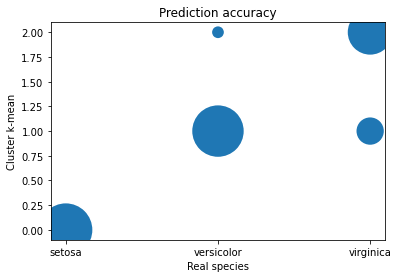

In [57]:
conf_KM = pd.DataFrame(columns=['real','real_name','predicted','density'])
for i in range (0, 3):
    for j in range (0,3) :
        if M_KM[i][j]>0 :
            new_row = pd.DataFrame({'real':i, 'real_name':dict_cat[i],'predicted':j, 'density':float(M_KM[i][j])}, index=[0])
            conf_KM=pd.concat([conf_KM,new_row], ignore_index=True)
            
print(conf_KM)
sns.scatterplot(x='real_name', y='predicted', s=(conf_KM.density)*60, data=conf_KM) 
pl.xlabel('Real species')
pl.ylabel('Cluster k-mean')
pl.title('Prediction accuracy')
show

This clustering also enables to predict label of a new specimen.the Cette classification de la population d'apprentissage permet également de prédire l appartenance d 'un nouveau spécimen. 
For instance, what is the cluster of a flower with  Petal and Sepal normalized lenght  and width of 0.5.?

In [58]:
      
D_kmeans=kmeans.predict(panda_New_specimen)
print('Using kmeans, the predicted species of such a flower is '+ dict_cat[dict_map_cluster[D_kmeans[0]]])

Using kmeans, the predicted species of such a flower is versicolor


# Export of the results

The following lines create a .csv file that encompass the predicted species.

In [59]:
nb_specimen=len(data_panda)

In [60]:
import csv
# writing the csv file
with open('my_prediction.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # writing the header
    writer.writerow(['Flower', 'Prediction GNB', 'Prediction k-means','Prediction NN'])
    # writing the data
    for i in range(nb_specimen):
        writer.writerow([i, dict_cat[Norm.loc[i,'Prediction_GNB']], dict_cat[int(Norm.loc[i,'Prediction_kmean_mapped'])],dict_cat[int(Norm.loc[i,'Prediction_NN'])]])
